In [1]:
import numpy as np
import pandas as pd
import  string
# Spacy--Lemmatization
import spacy
#Genism
#!pip install gensim
import gensim
from gensim import corpora
import re
from collections import Counter
from wordcloud import WordCloud
from gensim.utils import simple_preprocess
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show, output_notebook

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import nltk
from nltk.stem.porter import *
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

#for finding the error
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [4]:
import nltk
from nltk.stem.porter import *
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

#for finding the error
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [5]:
df= pd.read_csv("/content/tweets_cleaned_13_04_23.csv")
df

Unnamed: 0                                              Tweet Hashtag
0               0  effect of anthocyanins on gut health markers f...  health
1               1  good news recently accept position as software...  health
2               2  start keto this month eat about lbs of pork be...  health
3               3  be healthy mean get whole lot more out of life...  health
4               4  butterfly welcome the feed govt announcement o...  health
...           ...                                                ...     ...
17634       18496  the pakistan women football team have be annou...  sports
17635       18497  big ant studios and nacon cricket the official...  sports
17636       18498  list of injure players in ipl be increase day ...  sports
17637       18499  sport sponsorship cricket especially ipl domin...  sports
17638       18500  𝙉𝙀𝙒 𝙅𝙊𝘽 𝘼𝙇𝙀𝙍𝙏 aston villa fc lead sport therap...  sports

[17639 rows x 3 columns]

Number of articles per topic:


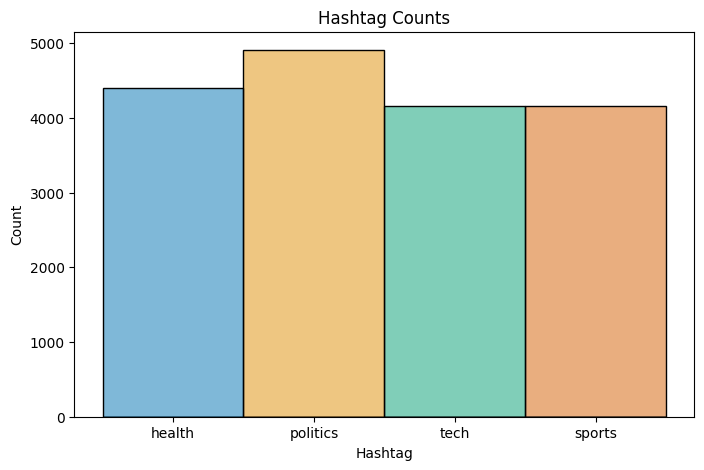

In [6]:
print('Number of articles per topic:')
fig, ax = plt.subplots(figsize=(8, 5))
ax2 = sns.histplot(
    data = df,
    x = 'Hashtag',
    hue = 'Hashtag',
    palette = 'colorblind',
    legend = False,
    ).set(
        title = 'Hashtag Counts');

**Remove URL**

In [7]:
def remove_tags_url(text):

  #pattern = re.compile("!#$%&'*+-.^_`|~:")
  pattern = re.compile(r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)')
  return pattern.sub(r'',text)

In [8]:
df['Tweet'].apply(remove_tags_url)

0        effect of anthocyanins on gut health markers f...
1        good news recently accept position as software...
2        start keto this month eat about lbs of pork be...
3        be healthy mean get whole lot more out of life...
4        butterfly welcome the feed govt announcement o...
                               ...                        
17634    the pakistan women football team have be annou...
17635    big ant studios and nacon cricket the official...
17636    list of injure players in ipl be increase day ...
17637    sport sponsorship cricket especially ipl domin...
17638    𝙉𝙀𝙒 𝙅𝙊𝘽 𝘼𝙇𝙀𝙍𝙏 aston villa fc lead sport therap...
Name: Tweet, Length: 17639, dtype: object

**Remove Puncuations**

In [9]:
import string
exclude = string.punctuation
def remove_punc(text):
  for char in exclude:
    text = text.replace(char, "")
  return text

In [10]:
exclude

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:

def remove_punctuations(text):
  return text.translate(str.maketrans(" "," ", exclude))

In [12]:
df['Tweet'].apply(remove_punctuations)

0        effect of anthocyanins on gut health markers f...
1        good news recently accept position as software...
2        start keto this month eat about lbs of pork be...
3        be healthy mean get whole lot more out of life...
4        butterfly welcome the feed govt announcement o...
                               ...                        
17634    the pakistan women football team have be annou...
17635    big ant studios and nacon cricket the official...
17636    list of injure players in ipl be increase day ...
17637    sport sponsorship cricket especially ipl domin...
17638    𝙉𝙀𝙒 𝙅𝙊𝘽 𝘼𝙇𝙀𝙍𝙏 aston villa fc lead sport therap...
Name: Tweet, Length: 17639, dtype: object

**Remove Stopwords**

In [13]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

def remove_stopwords(text):
  new_text = []
  for word in text.split():
    if word in stopwords.words('english'):
      new_text.append("")
    else:
      new_text.append(word)

  x = new_text[:]
  new_text.clear()
  return " ".join(x)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
df['Tweet'] = df['Tweet'].apply(remove_stopwords)
df

Unnamed: 0                                              Tweet Hashtag
0               0  effect  anthocyanins  gut health markers firmi...  health
1               1  good news recently accept position  software d...  health
2               2  start keto  month eat  lbs  pork belly  dozen ...  health
3               3   healthy mean get whole lot    life positive m...  health
4               4  butterfly welcome  feed govt announcement  mil...  health
...           ...                                                ...     ...
17634       18496   pakistan women football team   announce   fir...  sports
17635       18497  big ant studios  nacon cricket  official game ...  sports
17636       18498  list  injure players  ipl  increase day  day k...  sports
17637       18499  sport sponsorship cricket especially ipl domin...  sports
17638       18500  𝙉𝙀𝙒 𝙅𝙊𝘽 𝘼𝙇𝙀𝙍𝙏 aston villa fc lead sport therap...  sports

[17639 rows x 3 columns]

**Tokenization**

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
from nltk.tokenize import word_tokenize
df['Tweet'] = df['Tweet'].apply(word_tokenize)

In [17]:
df

Unnamed: 0                                              Tweet Hashtag
0               0  [effect, anthocyanins, gut, health, markers, f...  health
1               1  [good, news, recently, accept, position, softw...  health
2               2  [start, keto, month, eat, lbs, pork, belly, do...  health
3               3  [healthy, mean, get, whole, lot, life, positiv...  health
4               4  [butterfly, welcome, feed, govt, announcement,...  health
...           ...                                                ...     ...
17634       18496  [pakistan, women, football, team, announce, fi...  sports
17635       18497  [big, ant, studios, nacon, cricket, official, ...  sports
17636       18498  [list, injure, players, ipl, increase, day, da...  sports
17637       18499  [sport, sponsorship, cricket, especially, ipl,...  sports
17638       18500  [𝙉𝙀𝙒, 𝙅𝙊𝘽, 𝘼𝙇𝙀𝙍𝙏, aston, villa, fc, lead, spor...  sports

[17639 rows x 3 columns]

**Lemmatization**

In [18]:
df['Tweet'] = [','.join(map(str, l)) for l in df['Tweet']]

In [19]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatize = WordNetLemmatizer()
df['Tweet'].apply(wordnet_lemmatize.lemmatize)

[nltk_data] Downloading package wordnet to /root/nltk_data...


0        effect,anthocyanins,gut,health,markers,firmicu...
1        good,news,recently,accept,position,software,de...
2        start,keto,month,eat,lbs,pork,belly,dozen,egg,...
3        healthy,mean,get,whole,lot,life,positive,menta...
4        butterfly,welcome,feed,govt,announcement,milli...
                               ...                        
17634    pakistan,women,football,team,announce,first,ro...
17635    big,ant,studios,nacon,cricket,official,game,as...
17636    list,injure,players,ipl,increase,day,day,know,...
17637    sport,sponsorship,cricket,especially,ipl,domin...
17638    𝙉𝙀𝙒,𝙅𝙊𝘽,𝘼𝙇𝙀𝙍𝙏,aston,villa,fc,lead,sport,therap...
Name: Tweet, Length: 17639, dtype: object

In [20]:
df['Tweet'].shape[0]

17639

In [21]:
corpus = []
for i in range(df['Tweet'].shape[0]):
  y = df['Tweet'][i].split(',')
  corpus.append(y)

print(corpus)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [22]:
len(corpus)

17639

In [23]:
 df_list=df['Tweet'].tolist()
 print(df_list[1])
 print(corpus[1])


good,news,recently,accept,position,software,developer,consultant,deloitte,first,day,two,weeks,get,work,javafx,healthcare,usfda,java,javafx,health,medicine
['good', 'news', 'recently', 'accept', 'position', 'software', 'developer', 'consultant', 'deloitte', 'first', 'day', 'two', 'weeks', 'get', 'work', 'javafx', 'healthcare', 'usfda', 'java', 'javafx', 'health', 'medicine']


**TFIDF vectorization**

In [24]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer(max_df=1.0,min_df=4,
#                              max_features=None,
#                              ngram_range=(1, 2))
# vz = vectorizer.fit_transform(df['Tweet'])

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,
                             max_features=180000,
                             ngram_range=(1, 2))
vz=vectorizer.fit_transform(df['Tweet'])


In [25]:
vz.shape

(17639, 5618)

**Using SVD**

In [26]:

from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=30, random_state = 42)
svd_tfidf = svd.fit_transform(vz)
svd_tfidf.shape

(17639, 30)

**Using TSNE**

In [27]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose = 1, random_state =42, n_iter=500)
tsne_tfidf = tsne_model.fit_transform(svd_tfidf)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 17639 samples in 0.002s...
[t-SNE] Computed neighbors for 17639 samples in 4.203s...
[t-SNE] Computed conditional probabilities for sample 1000 / 17639
[t-SNE] Computed conditional probabilities for sample 2000 / 17639
[t-SNE] Computed conditional probabilities for sample 3000 / 17639
[t-SNE] Computed conditional probabilities for sample 4000 / 17639
[t-SNE] Computed conditional probabilities for sample 5000 / 17639
[t-SNE] Computed conditional probabilities for sample 6000 / 17639
[t-SNE] Computed conditional probabilities for sample 7000 / 17639
[t-SNE] Computed conditional probabilities for sample 8000 / 17639
[t-SNE] Computed conditional probabilities for sample 9000 / 17639
[t-SNE] Computed conditional probabilities for sample 10000 / 17639
[t-SNE] Computed conditional probabilities for sample 11000 / 17639
[t-SNE] Computed conditional probabilities for sample 12000 / 17639
[t-SNE] Computed conditional probabilities for sam

In [28]:
tsne_tfidf.shape

(17639, 2)

In [29]:
output_notebook()
plot_tfidf = bp.figure(plot_width=700, plot_height=600,
                       title="tf-idf clustering of the Tweet",
    tools="pan,wheel_zoom,box_zoom,reset,hover,save",
    x_axis_type=None, y_axis_type=None, min_border=1)

In [30]:
# tfidf_df['tokens'] = combined_sample['tokens']
tfidf_df = pd.DataFrame(tsne_tfidf, columns=['x', 'y'])
tfidf_df['Tweet'] = df['Tweet']
# tfidf_df['tokens'] = combined_sample['tokens']
#tfidf_df['Hashtag'] = df['Hashtag']
plot_tfidf.scatter(x='x', y='y', source=tfidf_df, alpha=0.7)
hover = plot_tfidf.select(dict(type=HoverTool))
hover.tooltips={"Tweet": "@Tweet", "tokens": "@tokens", "Hashtag":"@Hashtag"}
show(plot_tfidf)

**using Kmeans_clustering**

In [31]:
from sklearn.cluster import MiniBatchKMeans

num_clusters = 4 # need to be selected wisely
kmeans_model = MiniBatchKMeans(n_clusters=num_clusters,
                               init='k-means++',
                               random_state=21,
                               n_init=25,
                               init_size=1000, batch_size=1000, verbose=0, max_iter=1000)

In [32]:
colormap = np.array(["#6d8dca", "#69de53", "#723bca", "#c3e14c"])

In [33]:
kmeans = kmeans_model.fit(tsne_tfidf)
kmeans_clusters = kmeans.predict(tsne_tfidf)
kmeans_distances = kmeans.transform(tsne_tfidf)
tsne_kmeans = tsne_model.fit_transform(kmeans_distances)
kmeans_df = pd.DataFrame(tsne_kmeans, columns = ['x', 'y'])
kmeans_df['cluster'] = kmeans_clusters
kmeans_df['Tweet'] = df['Tweet']
# kmeans_df['Hashtag'] = combined_sample['Hashtag']
plot_kmeans = bp.figure(plot_width=700, plot_height=600,
                        title="KMeans clustering of the Tweet",
    tools="pan,wheel_zoom,box_zoom,reset,hover,save",
    x_axis_type=None, y_axis_type=None, min_border=1)
source = ColumnDataSource(data=dict(x=kmeans_df['x'], y=kmeans_df['y'],
                                    color=colormap[kmeans_clusters],
                                    Tweet=kmeans_df['Tweet'],
                                    #Hashtag=kmeans_df['Hashtag'],
                                    cluster=kmeans_df['cluster']))

plot_kmeans.scatter(x='x', y='y', color='color', source=source)
hover = plot_kmeans.select(dict(type=HoverTool))
hover.tooltips={"Tweet": "@Tweet", "cluster":"@cluster" }
show(plot_kmeans)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 17639 samples in 0.032s...
[t-SNE] Computed neighbors for 17639 samples in 0.586s...
[t-SNE] Computed conditional probabilities for sample 1000 / 17639
[t-SNE] Computed conditional probabilities for sample 2000 / 17639
[t-SNE] Computed conditional probabilities for sample 3000 / 17639
[t-SNE] Computed conditional probabilities for sample 4000 / 17639
[t-SNE] Computed conditional probabilities for sample 5000 / 17639
[t-SNE] Computed conditional probabilities for sample 6000 / 17639
[t-SNE] Computed conditional probabilities for sample 7000 / 17639
[t-SNE] Computed conditional probabilities for sample 8000 / 17639
[t-SNE] Computed conditional probabilities for sample 9000 / 17639
[t-SNE] Computed conditional probabilities for sample 10000 / 17639
[t-SNE] Computed conditional probabilities for sample 11000 / 17639
[t-SNE] Computed conditional probabilities for sample 12000 / 17639
[t-SNE] Computed conditional probabilities for sam

In [34]:
kmeans_df

x          y  cluster  \
0      -3.399127 -11.302929        2   
1       8.118706 -20.408276        2   
2      -0.027289 -36.567799        2   
3       5.919048 -25.349031        2   
4     -34.543713 -22.188110        2   
...          ...        ...      ...   
17634  48.708118   1.389528        1   
17635  17.997120  -8.563984        1   
17636  16.406448 -37.764599        1   
17637  42.005295 -22.201593        1   
17638  33.829376  11.684400        1   

                                                   Tweet  
0      effect,anthocyanins,gut,health,markers,firmicu...  
1      good,news,recently,accept,position,software,de...  
2      start,keto,month,eat,lbs,pork,belly,dozen,egg,...  
3      healthy,mean,get,whole,lot,life,positive,menta...  
4      butterfly,welcome,feed,govt,announcement,milli...  
...                                                  ...  
17634  pakistan,women,football,team,announce,first,ro...  
17635  big,ant,studios,nacon,cricket,official,game,as...  
17636  list,injure,players,ipl,increase,day,day,know,...  
17637  sport,sponsorship,cricket,especially,ipl,domin...  
17638  𝙉𝙀𝙒,𝙅𝙊𝘽,𝘼𝙇𝙀𝙍𝙏,aston,villa,fc,lead,sport,therap...  

[17639 rows x 4 columns]

**WordCloud**

In [35]:
from wordcloud import WordCloud
wc = WordCloud(width = 1000, height = 1000, min_font_size = 10, background_color='white')

['technology', 'ai', 'amp', 'politic', 'new', 'use', 'future', 'blockchain technology', 'ai technology', 'make']


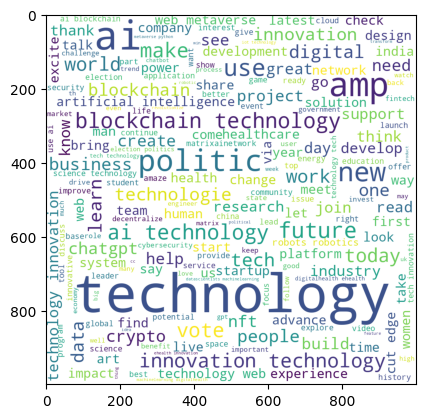

In [36]:
cl0 = wc.generate(kmeans_df [kmeans_df['cluster'] == 0]['Tweet'].str.cat(sep = ' '))
# Get the word frequencies from the word cloud image
word_frequencies = Counter(cl0.words_)

# Set the number of top words you want to extract
num_top_words = 10

# Extract the most frequent words
c0_pred_list =[]
for i in range(10):
  c0_pred_list.append(word_frequencies.most_common(num_top_words)[i][0])
print(c0_pred_list)
#generate the wordcloud
plt.imshow(cl0)

['sport', 'football', 'ipl ipl', 'cricket', 'game', 'new', 'football sport', 'team', 'match', 'win']


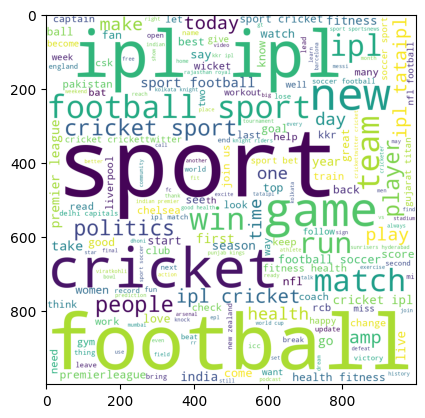

In [37]:
cl1 = wc.generate(kmeans_df [kmeans_df['cluster'] == 1]['Tweet'].str.cat(sep = ' '))
word_frequencies = Counter(cl1.words_)

# Set the number of top words you want to extract
num_top_words = 10

# Extract the most frequent words
c1_pred_list =[]
for i in range(10):
  c1_pred_list.append(word_frequencies.most_common(num_top_words)[i][0])
print(c1_pred_list)
#generate the wordcloud
plt.imshow(cl1)

['health', 'amp', 'mentalhealth', 'mental health', 'new', 'technology', 'need', 'work', 'today', 'support']


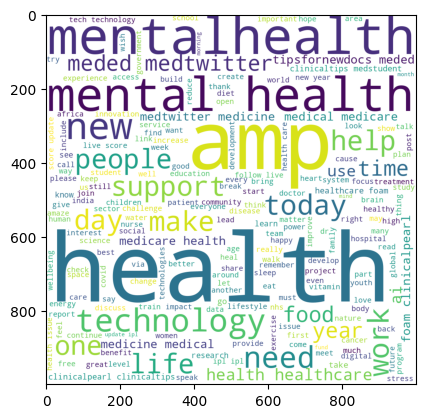

In [38]:
cl2 = wc.generate(kmeans_df [kmeans_df['cluster'] == 2]['Tweet'].str.cat(sep = ' '))
word_frequencies = Counter(cl2.words_)

# Set the number of top words you want to extract
num_top_words = 10

# Extract the most frequent words
c2_pred_list =[]
for i in range(10):
  c2_pred_list.append(word_frequencies.most_common(num_top_words)[i][0])
print(c2_pred_list)
#generate the wordcloud
plt.imshow(cl2)

['politics', 'bjp', 'say', 'congress', 'think', 'amp', 'politics usa', 'government', 'breakingnews politics', 'usa news']


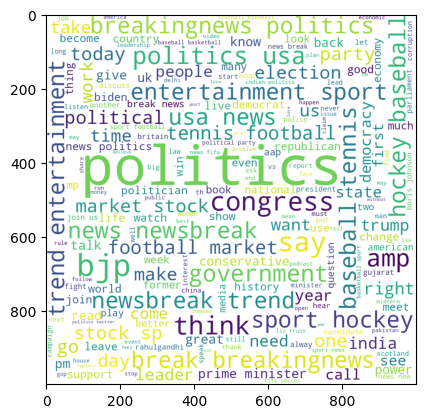

In [39]:
cl3= wc.generate(kmeans_df [kmeans_df['cluster'] == 3]['Tweet'].str.cat(sep = ' '))
word_frequencies = Counter(cl3.words_)

# Set the number of top words you want to extract
num_top_words = 10

# Extract the most frequent words
c3_pred_list =[]
for i in range(10):
  c3_pred_list.append(word_frequencies.most_common(num_top_words)[i][0])
print(c3_pred_list)
#generate the wordcloud
plt.imshow(cl3)

**Similarity Score**

In [40]:
def score_calc(pred_list):
  # Dictionary with categories and lists of words
  word_lists = {'health': ['health',
    'amp',
    'mentalhealth',
    'mental',
    'new',
    'life',
    'healthcare',
    'fitness',
    'get',
    'good'],
  'sports': ['sport',
    'ipl',
    'girlsfootball',
    'cricket',
    'news',
    'match',
    'win',
    'vs',
    'game',
    'team'],
  'tech': ['technology',
    'ai',
    'blockchain',
    'innovation',
    'amp',
    'tech',
    'new',
    'web',
    'use',
    'future'],
  'politics': ['politics',
    'amp',
    'bjp',
    'vote',
    'people',
    'party',
    'congress',
    'say',
    'new',
    'news']}
  word_list_to_compare = pred_list
  def jaccard_similarity(list1, list2):
      set1 = set(list1)
      set2 = set(list2)
      intersection = len(set1.intersection(set2))
      union = len(set1.union(set2))
      similarity = intersection / union
      return similarity

  # Calculate similarity between the word list and each category in the dictionary
  similarity_scores = {}
  for category, words in word_lists.items():
      # category_doc = nlp(" ".join(words))
      # word_list_doc = nlp(" ".join(word_list_to_compare))
      similarity_scores[category] = jaccard_similarity(word_list_to_compare, words)

  # Print the similarity scores
  for category, similarity_score in similarity_scores.items():
      print(f"Similarity with '{category}': {similarity_score:.4f}")

In [41]:
score_calc(c3_pred_list)

Similarity with 'health': 0.0526
Similarity with 'sports': 0.0000
Similarity with 'tech': 0.0526
Similarity with 'politics': 0.3333


**Coherence Score**

In [42]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

topics=[]

# top_40_wrods_topic_0=top_40_wrods_topic_0
# top_40_wrods_topic_1=top_40_wrods_topic_1
# # top_40_wrods_topic_2=top_40_wrods_topic_2

topics.append(c0_pred_list)
topics.append(c1_pred_list)
topics.append(c2_pred_list)
topics.append(c3_pred_list)
print(topics)

# Creating a dictionary with the vocabulary
word2id = Dictionary(corpus)

# Coherence model
cm = CoherenceModel(topics=topics,
                     texts= corpus,
                    coherence='c_v',
                    dictionary=word2id)

coherence_per_topic = cm.get_coherence_per_topic()
coherence = cm.get_coherence()
print(coherence)

[['technology', 'ai', 'amp', 'politic', 'new', 'use', 'future', 'blockchain technology', 'ai technology', 'make'], ['sport', 'football', 'ipl ipl', 'cricket', 'game', 'new', 'football sport', 'team', 'match', 'win'], ['health', 'amp', 'mentalhealth', 'mental health', 'new', 'technology', 'need', 'work', 'today', 'support'], ['politics', 'bjp', 'say', 'congress', 'think', 'amp', 'politics usa', 'government', 'breakingnews politics', 'usa news']]
0.539336658019374


In [43]:
dictionary = {'tech' : c0_pred_list, 'sports' : c1_pred_list, 'health' : c2_pred_list, 'politics' : c3_pred_list}
dictionary

{'tech': ['technology',
  'ai',
  'amp',
  'politic',
  'new',
  'use',
  'future',
  'blockchain technology',
  'ai technology',
  'make'],
 'sports': ['sport',
  'football',
  'ipl ipl',
  'cricket',
  'game',
  'new',
  'football sport',
  'team',
  'match',
  'win'],
 'health': ['health',
  'amp',
  'mentalhealth',
  'mental health',
  'new',
  'technology',
  'need',
  'work',
  'today',
  'support'],
 'politics': ['politics',
  'bjp',
  'say',
  'congress',
  'think',
  'amp',
  'politics usa',
  'government',
  'breakingnews politics',
  'usa news']}

In [44]:
X = df.drop(columns = 'Hashtag')
y = df['Hashtag']

# label encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
tweets_y = le.fit_transform(y)

In [45]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
le_name_mapping

{'health': 0, 'politics': 1, 'sports': 2, 'tech': 3}

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(X, tweets_y, test_size=0.30, random_state=42)

In [47]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

# Set up NLTK stopwords
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

# Dataset of texts
dataset = x_test['Tweet'].tolist()

# Predefined dictionary of categories
categories = dictionary

# Remove stopwords and tokenize the dataset
tokenized_dataset = []
for text in dataset:
    tokens = word_tokenize(text.lower())
    filtered_words = [word for word in tokens if word.isalnum() and word not in stop_words]
    tokenized_dataset.append(filtered_words)

# Train Word2Vec model
model = Word2Vec(tokenized_dataset, min_count=1, vector_size=300, epochs=100)

# Calculate similarity of each text to the dictionary words
results = []
for text in dataset:
    tokens = word_tokenize(text.lower())
    filtered_words = [word for word in tokens if word.isalnum() and word not in stop_words]

    similarities = {}
    for category, words in categories.items():
        category_vectors = [model.wv[word] for word in words if word in model.wv.key_to_index]
        if category_vectors:
            category_similarity = sum(model.wv.n_similarity([category_vector], filtered_words) for category_vector in category_vectors)
            similarities[category] = category_similarity

    predicted_category = max(similarities, key=similarities.get)
    results.append((text, predicted_category))

# Create a dataframe with the text and classification
df_new = pd.DataFrame(results, columns=['Text', 'Classification'])
df_new


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Text Classification
0     match,rcb,dominate,mi,ipl,thank,impressive,per...         sports
1     eco,friendly,fire,extinguisher,seem,good,true,...           tech
2     globalwarming,sdgs,climatechange,climatecrisis...           tech
3     like,innovation,ai,undoubtedly,drawbacks,often...           tech
4     get,know,leaders,part,sxsw,spy,supercharge,tec...           tech
...                                                 ...            ...
5287  elections,bjp,lose,himachal,reason,amp,lead,ph...       politics
5288  crunchy,raw,vegan,broccoli,chip,genius,health,...         health
5289  sos,children,villages,sri,lanka,partner,lanka,...         health
5290     canadian,ncaa,program,drop,football,espn,sport         sports
5291  theepochtimes,host,debate,among,candidates,ten...       politics

[5292 rows x 2 columns]

In [48]:
df_new['Classification'] = df_new.Classification.map({'health': 0, 'politics': 1, 'sports': 2, 'tech': 3})

In [49]:
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report
acc = accuracy_score(Y_test, df_new.Classification)
cm = confusion_matrix(Y_test, df_new.Classification)
acc, cm

(0.8373015873015873,
 array([[1244,   19,   38,   20],
        [ 221, 1174,   53,   18],
        [   1,    1, 1231,    3],
        [ 456,    7,   24,  782]]))

In [50]:
print(classification_report(Y_test, df_new.Classification))

              precision    recall  f1-score   support

           0       0.65      0.94      0.77      1321
           1       0.98      0.80      0.88      1466
           2       0.91      1.00      0.95      1236
           3       0.95      0.62      0.75      1269

    accuracy                           0.84      5292
   macro avg       0.87      0.84      0.84      5292
weighted avg       0.87      0.84      0.84      5292

